# Импорт библиотек + загрузка данных

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [101]:
df = pd.read_excel("Cian_Data_demo_b2b.xlsx", sheet_name="06-price-cian")

# Feature engineering

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cianid                        10000 non-null  int64  
 1   id                            10000 non-null  int64  
 2   house_id_acv2                 5249 non-null   float64
 3   status                        10000 non-null  object 
 4   price_sqm                     10000 non-null  int64  
 5   bargainterms_price            9867 non-null   float64
 6   bargainterms_price_start      9819 non-null   float64
 7   bargainterms_price_max        9819 non-null   float64
 8   bargainterms_price_min        9819 non-null   float64
 9   bargainterms_currency         10000 non-null  object 
 10  creationdate                  10000 non-null  object 
 11  last_activity_date            9957 non-null   object 
 12  closing_reason                41 non-null     object 
 13  ba

In [103]:
df.sample(1)

,cianid,id,house_id_acv2,status,price_sqm,bargainterms_price,bargainterms_price_start,bargainterms_price_max,bargainterms_price_min,bargainterms_currency,...,acv_geo_house,acv_geo_region,acv_geo_street,acv_geo_raion_regiona,acv_geo_dis_mikroraion,acv_geo_dis_okrug_human,acv_geo_dis_raion_human,isqualify,isduplicated,ispricequalify
4727,263373319,263373319,8753964.00,Published,133259,6177900.00,6177900.00,6177900.00,6177900.00,rur,...,к3.2,Московская,Пригород Лесное мкр,Ленинский городской округ,NaN,NaN,NaN,True,False,True


In [104]:
df.columns

Index(['cianid', 'id', 'house_id_acv2', 'status', 'price_sqm',
       'bargainterms_price', 'bargainterms_price_start',
       'bargainterms_price_max', 'bargainterms_price_min',
       'bargainterms_currency', 'creationdate', 'last_activity_date',
       'closing_reason', 'bargainterms_saletype', 'geo_jk_name', 'geo_jk_id',
       'geo_jk_house_name', 'geo_jk_house_id', 'roomscount', 'totalarea',
       'livingarea', 'kitchenarea', 'floornumber',
       'jk_house_flat_sectionnumber', 'jk_house_flat_flatnumber',
       'jk_house_flat_flattype', 'decoration', 'repairtype',
       'combinedwcscount', 'separatewcscount', 'balconiescount',
       'loggiascount', 'allroomsarea', 'undergrounds_name_0',
       'undergrounds_time_0', 'undergrounds_transporttype_0', 'isapartments',
       'ispenthouse', 'publisheduserid', 'geo_lat', 'geo_lng', 'acv_geo_gorod',
       'acv_geo_gorod_raw', 'acv_geo_house', 'acv_geo_region',
       'acv_geo_street', 'acv_geo_raion_regiona', 'acv_geo_dis_mikroraion

Выберем признаки из соображений, что конечному пользователю будет легко их указать & признаки, хорошо представленные в данных

In [105]:
features = ['roomscount', 'totalarea',
       'livingarea', 'kitchenarea', 'floornumber',
       'jk_house_flat_sectionnumber', 'jk_house_flat_flatnumber',
       'jk_house_flat_flattype',
       'loggiascount', 'allroomsarea', 'geo_lat', 'geo_lng']

target = "price_sqm"  # Будем учится определять цену за кв. м. зная features

In [106]:
df_features = df[features]
df_target = df[target]

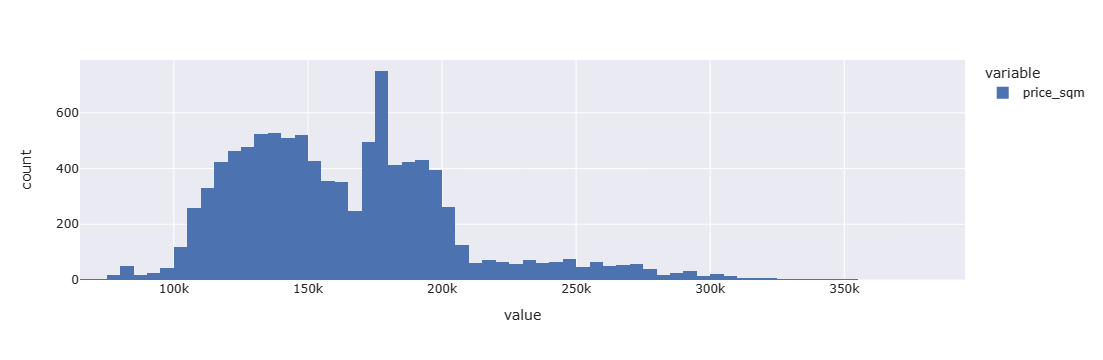

In [107]:
px.histogram(df_target, template="seaborn")

In [108]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roomscount                   8592 non-null   float64
 1   totalarea                    10000 non-null  float64
 2   livingarea                   5808 non-null   float64
 3   kitchenarea                  5568 non-null   float64
 4   floornumber                  10000 non-null  int64  
 5   jk_house_flat_sectionnumber  8380 non-null   object 
 6   jk_house_flat_flatnumber     6308 non-null   float64
 7   jk_house_flat_flattype       9519 non-null   object 
 8   loggiascount                 1070 non-null   float64
 9   allroomsarea                 4493 non-null   object 
 10  geo_lat                      10000 non-null  float64
 11  geo_lng                      10000 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 937.6+ KB


In [109]:
df_features

,roomscount,totalarea,livingarea,kitchenarea,floornumber,jk_house_flat_sectionnumber,jk_house_flat_flatnumber,jk_house_flat_flattype,loggiascount,allroomsarea,geo_lat,geo_lng
0,2.00,56.45,27.10,14.20,1,1,5.00,2-56,1.00,15.08+12.05,55.56,37.71
1,1.00,44.43,13.90,18.20,3,1,2.00,1-44.43,1.00,13.90,55.67,37.74
2,1.00,44.43,13.90,18.20,7,1,2.00,1-44.43,1.00,13.90,55.67,37.74
3,NaN,28.48,18.40,NaN,13,1,4.00,1-28.48,1.00,18.40,55.67,37.74
4,2.00,66.18,32.90,14.20,16,1,10.00,2-66.18,1.00,32.90,55.67,37.74
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,31.75,13.00,5.00,4,5,NaN,1-31.75,NaN,13.01,55.64,37.94
9996,1.00,31.60,10.10,12.20,11,NaN,NaN,NaN,1.00,10.1,55.56,37.83
9997,NaN,18.00,15.00,NaN,17,NaN,NaN,NaN,0.00,15.00,55.65,37.93
9998,2.00,36.39,22.00,6.60,12,3,NaN,2-36.39,NaN,11.44-10.58,55.62,37.95


In [74]:
df_features.head(3)

,roomscount,totalarea,livingarea,kitchenarea,floornumber,jk_house_flat_sectionnumber,jk_house_flat_flatnumber,jk_house_flat_flattype,loggiascount,allroomsarea,publisheduserid,geo_lat,geo_lng
0,2.0,56.45,27.1,14.2,1,1,5.0,2-56,1.0,15.08+12.05,34407421,55.56319,37.70996
1,1.0,44.43,13.9,18.2,3,1,2.0,1-44.43,1.0,13.90,31960811,55.66528,37.73732
2,1.0,44.43,13.9,18.2,7,1,2.0,1-44.43,1.0,13.90,31960811,55.66528,37.73732


Спецефический тип данных в колонках allroomsarea, jk_house_flat_flattype

In [133]:
for col in ("allroomsarea", "jk_house_flat_flattype", "jk_house_flat_sectionnumber"): # Обработка колонок
    
    for ind, item in enumerate(df_features[col]):
        if "+" in str(item) or "-" in str(item):
            try:
                if (index := item.find("+")) != -1:
                    to_fill = (float(item[:index - 1].replace(",", ".")) ** 2 + float(item[:index].replace(",", ".")) ** 2) ** 0.5
                elif (index := item.find("-")) != -1:
                    to_fill = (float(item[:index - 1].replace(",", ".")) ** 2 + float(item[:index].replace(",", ".")) ** 2) ** 0.5
            except ValueError:
                pass
    
            df_features[col][ind] = float(to_fill)
        if type(df_features[col][ind]) == type('asd'):
            df_features[col][ind] = float(df_features[col][ind].replace(",", "."))
        df_features[col][ind] = float(df_features[col][ind])
        
df_features['jk_house_flat_sectionnumber'] = df_features['jk_house_flat_sectionnumber'].replace({'II': 2, 'IV': 4})

In [113]:
df_features

,roomscount,totalarea,livingarea,kitchenarea,floornumber,jk_house_flat_sectionnumber,jk_house_flat_flatnumber,jk_house_flat_flattype,loggiascount,allroomsarea,geo_lat,geo_lng
0,2.00,56.45,27.10,14.20,1,1,5.00,21.51,1.00,21.27,55.56,37.71
1,1.00,44.43,13.90,18.20,3,1,2.00,21.51,1.00,13.90,55.67,37.74
2,1.00,44.43,13.90,18.20,7,1,2.00,21.51,1.00,13.90,55.67,37.74
3,NaN,28.48,18.40,NaN,13,1,4.00,21.51,1.00,18.40,55.67,37.74
4,2.00,66.18,32.90,14.20,16,1,10.00,21.51,1.00,32.90,55.67,37.74
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,31.75,13.00,5.00,4,5,NaN,21.51,NaN,13.01,55.64,37.94
9996,1.00,31.60,10.10,12.20,11,NaN,NaN,NaN,1.00,10.1,55.56,37.83
9997,NaN,18.00,15.00,NaN,17,NaN,NaN,NaN,0.00,15.00,55.65,37.93
9998,2.00,36.39,22.00,6.60,12,3,NaN,21.51,NaN,16.15,55.62,37.95


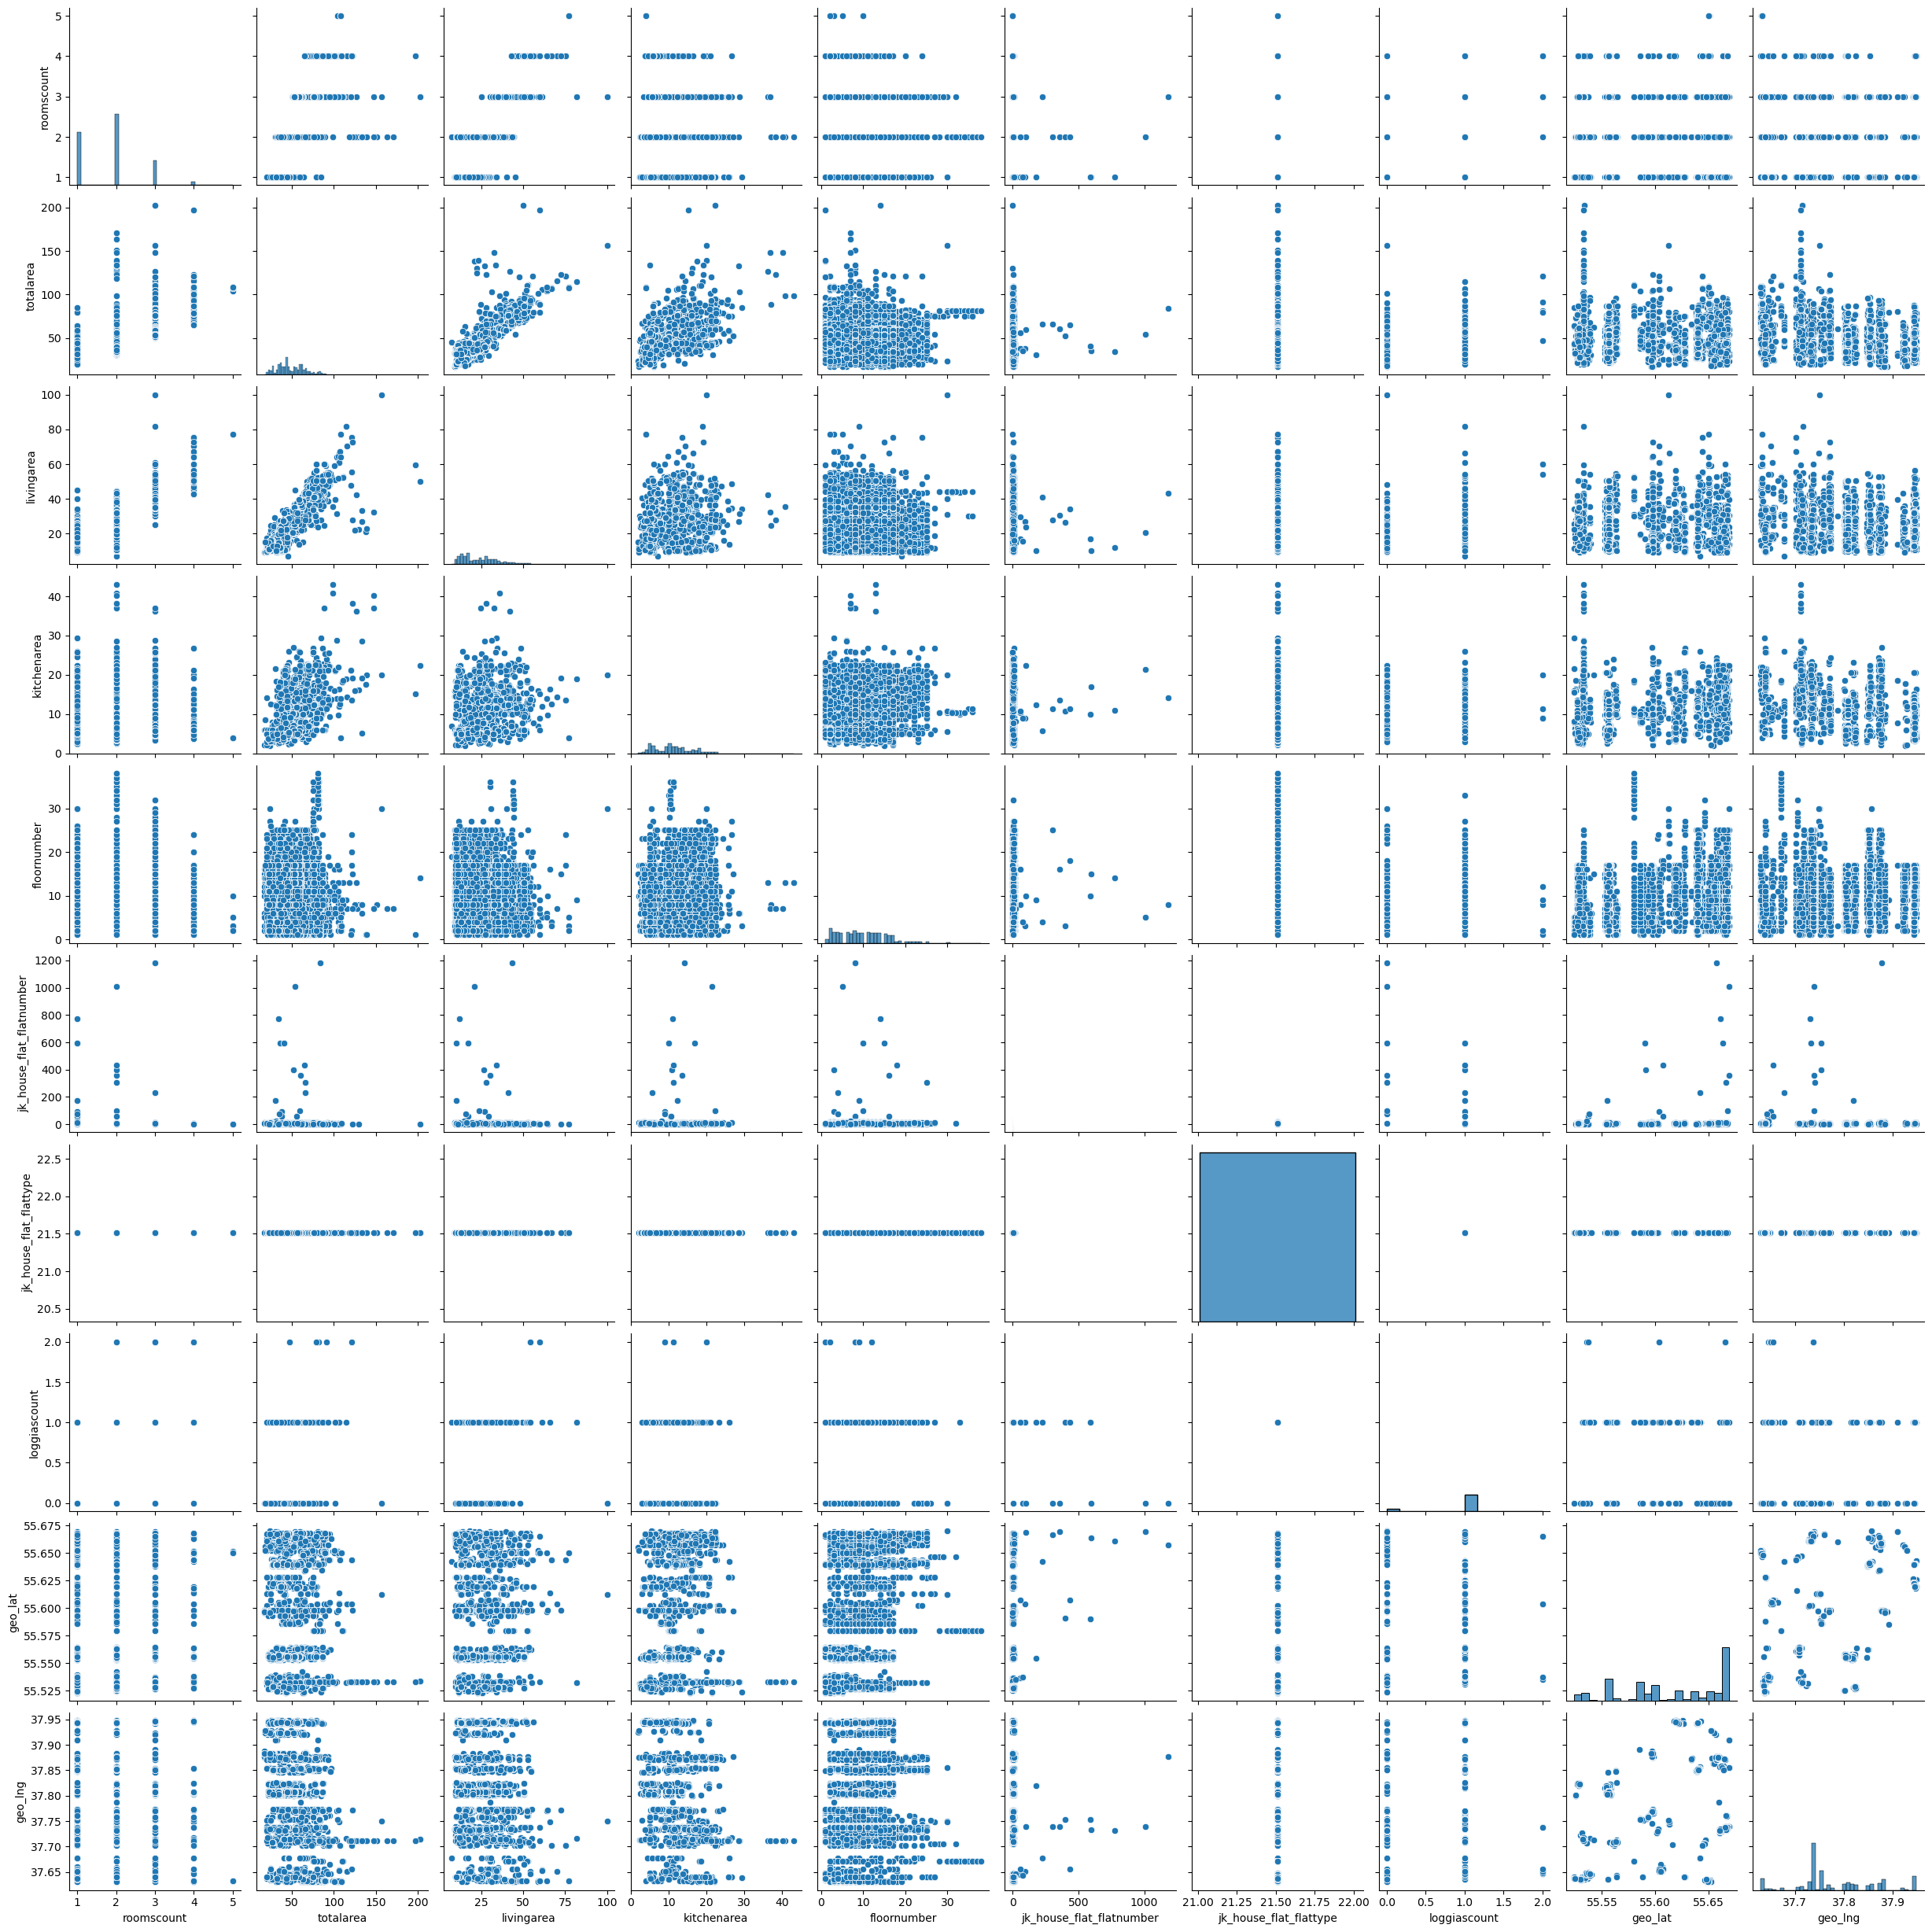

In [114]:
sns.pairplot(df_features)

Заполним пропуски в соответствии с распределениями величин

In [130]:
for to_fill in features:

    mask = df_features[to_fill].isna()
    # считаем статистику распределения значений
    p = df_features[to_fill].value_counts() / len(df_features[to_fill].dropna())
    # заполняем пропуски с вероятностью `p`
    df_features.loc[mask, to_fill] = \
        np.random.choice(p.index.to_list(),
                        size=mask.sum(),
                        p=p.to_list())

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roomscount                   10000 non-null  float64
 1   totalarea                    10000 non-null  float64
 2   livingarea                   10000 non-null  float64
 3   kitchenarea                  10000 non-null  float64
 4   floornumber                  10000 non-null  int64  
 5   jk_house_flat_sectionnumber  10000 non-null  object 
 6   jk_house_flat_flatnumber     10000 non-null  float64
 7   jk_house_flat_flattype       10000 non-null  object 
 8   loggiascount                 10000 non-null  float64
 9   allroomsarea                 10000 non-null  object 
 10  geo_lat                      10000 non-null  float64
 11  geo_lng                      10000 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 937.6+ KB


# Обучение модели

Выбор модели

In [82]:
!pip install lazypredict

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.4 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 1.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 2.7 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 4.5 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.3 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 10.6 MB/s eta 0:00:10
   ---------------------------------------- 0.8/99.8 MB 9.8 MB/s eta 0:00:11
   ---------------------------------------- 1.2/99.8 MB 9.3 MB/s eta 0:00:11
   ---------------------------------------- 1.2/99.8 MB 9.3 MB/s eta 0:00:11
   ---------------------------------------- 1.2/99.8 MB 9.3 MB/s eta 0:00:11
   ----------------

In [119]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

X, y = df_features.to_numpy(), df_target.to_numpy()
for k1, i in enumerate(X):
  for k2, j in enumerate(i):
    if isinstance(j, str):
      X[k1][k2] = j.replace(',', '.')
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

 71%|███████▏  | 30/42 [01:34<00:25,  2.11s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [01:58<00:02,  2.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 11
[LightGBM] [Info] Start training from score 164453.765889


100%|██████████| 42/42 [01:59<00:00,  2.84s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.91,0.91,10531.35,0.48
HistGradientBoostingRegressor,0.91,0.91,10683.77,2.31
ExtraTreesRegressor,0.91,0.91,10799.17,6.22
XGBRegressor,0.91,0.91,10923.71,0.65
RandomForestRegressor,0.90,0.90,11393.36,11.94
GradientBoostingRegressor,0.89,0.89,11902.97,2.94
BaggingRegressor,0.88,0.88,12199.77,1.33
ExtraTreeRegressor,0.80,0.80,16037.21,0.11
AdaBoostRegressor,0.79,0.80,16178.22,1.04


Выбираем lgbm

In [143]:
X, y = df_features.to_numpy(), df_target.to_numpy()

In [144]:
import lightgbm as lgb

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

model = LGBMRegressor(metric='rmse')
model.fit(X, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1452
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 11
[LightGBM] [Info] Start training from score 163558.667400


LGBMRegressor(metric='rmse')

Сохраним модель

In [146]:
import joblib
joblib.dump(model, "model_house_price.joblib")

['model_house_price.joblib']

In [90]:
dict_unique = {key: df_features[key].unique().tolist() for key in df_features.columns}

In [139]:
df_features.assign(price_sqm=df_target).to_csv("df_final.csv")

In [142]:
max(df_features.allroomsarea)

62.0

In [140]:
for d in df_features.columns:

    for e, i in enumerate(df_target):
        if type(i) == type('as'):
            print(e, i)

In [148]:
y.shape

(10000,)